In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [17]:
epochs = 100
lr = 1e-3
batch_size =64
img_dims = (125,125,3)

data = []
labels = []


image_files = [f for f in glob.glob(r'C:\Users\Sagar\archive' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [18]:
# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    try:
        image = cv2.resize(image, (img_dims[0],img_dims[1]))
        image = img_to_array(image)
    except:
            break
    data.append(image)

    label = img.split(os.path.sep)[-2]
    if label == "men":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

# pre-processing

data = np.array(data) / 255
labels = np.array(labels)

In [19]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.3,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) 
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [20]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [21]:
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [22]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
6/6 [==============================] - 18s 3s/step - loss: 1.6568 - accuracy: 0.5123 - val_loss: 0.7238 - val_accuracy: 0.3763
Epoch 2/100
6/6 [==============================] - 17s 3s/step - loss: 0.9622 - accuracy: 0.5913 - val_loss: 0.7530 - val_accuracy: 0.3763
Epoch 3/100
6/6 [==============================] - 15s 2s/step - loss: 0.8060 - accuracy: 0.6131 - val_loss: 0.6829 - val_accuracy: 0.6075
Epoch 4/100
6/6 [==============================] - 13s 2s/step - loss: 0.8127 - accuracy: 0.6022 - val_loss: 0.6949 - val_accuracy: 0.6237
Epoch 5/100
6/6 [==============================] - 13s 2s/step - loss: 0.6735 - accuracy: 0.6866 - val_loss: 0.7056 - val_accuracy: 0.6237
Epoch 6/100
6/6 [==============================] - 13s 2s/step - loss: 0.7202 - accuracy: 0.6894 - val_loss: 0.7392 - val_accuracy: 0.6237
Epoch 7/100
6/6 [==============================] - 13s 2s/step - loss: 0.6619 - accuracy: 

Epoch 58/100
6/6 [==============================] - 13s 2s/step - loss: 0.2670 - accuracy: 0.8672 - val_loss: 0.9056 - val_accuracy: 0.5914
Epoch 59/100
6/6 [==============================] - 12s 2s/step - loss: 0.2600 - accuracy: 0.8910 - val_loss: 1.1613 - val_accuracy: 0.5914
Epoch 60/100
6/6 [==============================] - 15s 2s/step - loss: 0.2391 - accuracy: 0.9155 - val_loss: 1.6997 - val_accuracy: 0.4892
Epoch 61/100
6/6 [==============================] - 15s 2s/step - loss: 0.2773 - accuracy: 0.8774 - val_loss: 1.1900 - val_accuracy: 0.5968
Epoch 62/100
6/6 [==============================] - 14s 2s/step - loss: 0.2212 - accuracy: 0.9128 - val_loss: 1.4105 - val_accuracy: 0.6129
Epoch 63/100
6/6 [==============================] - 13s 2s/step - loss: 0.2376 - accuracy: 0.9019 - val_loss: 0.9837 - val_accuracy: 0.6398
Epoch 64/100
6/6 [==============================] - 13s 2s/step - loss: 0.2268 - accuracy: 0.9089 - val_loss: 1.5534 - val_accuracy: 0.6290
Epoch 65/100
6/6 [==

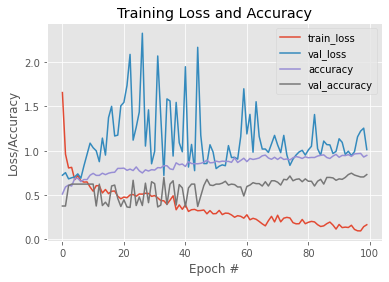

In [23]:
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')

In [24]:
model.save('menwomen.h5')

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [27]:
labels_new = ['women','men']
IMG_SIZE = 125
def prepare(filepath, face_cas="haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = load_model('menwomen.h5')

In [30]:
prediction = model.predict([prepare("C:\\Users\\Sagar\\archive\\men\\00000008.jpg")])
np.argmax(prediction)

1

In [31]:
prediction = model.predict([prepare("C:\\Users\\Sagar\\archive\\women\\00000023.jpg")])
np.argmax(prediction)

0